In [1]:
# all libraries used in this notebook

import os.path
from pathlib import Path
import re
import librosa
import math
import numpy as np
import matplotlib.pyplot as plt
import sys
import importlib

In [2]:
# import necessary functions from the folder "05_Utilities"

cwd = str(Path.cwd()) ## current working directory, should be the path to "01_Dataset", in which this notebook is located
parent_dir = str(Path(cwd).parent) ## parent dir of the current working directory, should be the project directory
utilities_dir_full_path = os.path.join(parent_dir, "05_Utilities") ## full path to the "05_Utilities" folder

# import moduls for audio file processing and mel-spectrogram plotting

sys.path.append(utilities_dir_full_path) ## add the path of the "05_Utilities" folder to the sys.path list
#from audioProcessing import processAudio ## modul for audio file processing and mel-spectrogram generation
import audioProcessing
import spectrogramPlotting ## modul for mel-spectrogram visualization
import sharedValues ## modul for shared variables between the classes

importlib.reload(audioProcessing)
importlib.reload(spectrogramPlotting)
importlib.reload(sharedValues)

# make instances of the classes in the modules
#processAudio = processAudio()
processAudio = audioProcessing.processAudio()
spectrogramPlotter = spectrogramPlotting.spectrogramPlotter()
sharedValuesConfig =sharedValues.sharedValuesConfig()



In [3]:
# list all audio file datasets in folder "01_Data/01_audioDatasets"

audio_datasets_main_dir_name = "01_Dataset/01_audioDatasets"
audio_datasets_main_dir = os.path.join(parent_dir, audio_datasets_main_dir_name)
audio_datasets = []

if os.path.exists(audio_datasets_main_dir):
    for i in os.listdir(audio_datasets_main_dir):
        #if folder name does not start with a dot
        if i[0] != ".": 
            audio_datasets.append(i)
    audio_datasets = sorted(audio_datasets) # sort the list of audio datasets
else:
    print("\"01_Dataset/01_audioDatasets\" directory does not exist or is not in the correct location.")

print(audio_datasets)

['01_Ethernet', '02_Ethernet_Test', '03_HVA280', '04_HVA280_Test', '05_HVA630', '06_HVA630_Test', '07_Noise_Samples', 'voice_memo_loc_mac.txt']


In [4]:
dataset_num = 5
print("Selected dataset: ", audio_datasets[dataset_num])

Selected dataset:  06_HVA630_Test


In [5]:
# add audio files from selected dataset to a list

# sorting function by numbers in the name
def sort_key_func(file_name):
        numbers = re.findall(r'_(\d+)', file_name)
        if numbers:
            return int(numbers[0])
        return file_name

audio_dataset_dir_path = os.path.join(audio_datasets_main_dir, audio_datasets[dataset_num])
audio_files = [f for f in os.listdir(audio_dataset_dir_path) if f.endswith('.m4a')]
audio_files_sorted = sorted(audio_files, key=sort_key_func)

label_file = [f for f in os.listdir(audio_dataset_dir_path) if f.endswith('.txt')][0]
label_file_path = os.path.join(audio_dataset_dir_path, label_file)

with open(label_file_path, "r") as file:
    labels = [line.strip() for line in file]

print(f"Dataset length: {len(audio_files_sorted)}")

i = 0
print("First 5 files in the selected dataset:")
while i < 5:
    print(audio_files_sorted[i])
    i += 1

i = 0
while i < 5:
    print(labels[i])
    i += 1

Dataset length: 30
First 5 files in the selected dataset:
HVA630_test_1.m4a
HVA630_test_2.m4a
HVA630_test_3.m4a
HVA630_test_4.m4a
HVA630_test_5.m4a
25,36
23,1
26,29
23,88
25,95


In [6]:
# constant parameters from the notebook "preprocessing_audio_wo_additional_noise.ipynb"

sampling_rate = sharedValuesConfig.SAMPLING_RATE ## sampling rate of the audio files
chunk_size = sharedValuesConfig.CHUNK_SIZE ## number of samples in one chunk of audio data
resolution = sharedValuesConfig.RESOLUTION ## time resolution of the mel-spectrogram
spectrogram_columns_per_chunk = sharedValuesConfig.SPECTROGRAM_COLUMNS_PER_CHUNK ## number of spectrogram columns in one chunk of audio data
hop_length = sharedValuesConfig.HOP_LENGTH ## number of samples between successive frames in the STFT
n_mels = sharedValuesConfig.N_MELS ## number of mel bands (rows in the mel-scaled spectrogram)
f_min = sharedValuesConfig.F_MIN ## minimum frequency in Hz
f_max = sharedValuesConfig.F_MAX ## maximum frequency in Hz
dB_ref = sharedValuesConfig.DB_REF ## reference value for dB conversion
a_squere_min = sharedValuesConfig.A_SQUERE_MIN ## min value for dB conversion
top_dB_abs = sharedValuesConfig.TOP_DB_ABS ## maximum dB value

Selected file: HVA630_test_21.m4a


/Users/mateseidl/Library/CloudStorage/OneDrive-SZTAKI/_SZTAKI/03_Masters_thesis/01_TUM_Masterarbeit_Ausarbeitung/07_Click_event_detection_software/01_Electrical_Connector_Click-Event_Detection_git_repo/05_Utilities/audioProcessing.py:53: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sampling_rate = librosa.load(audio_file_path, sr=sampling_rate)
/opt/anaconda3/envs/clickSense/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Max value in the power spectrogram: 2117.218017578125


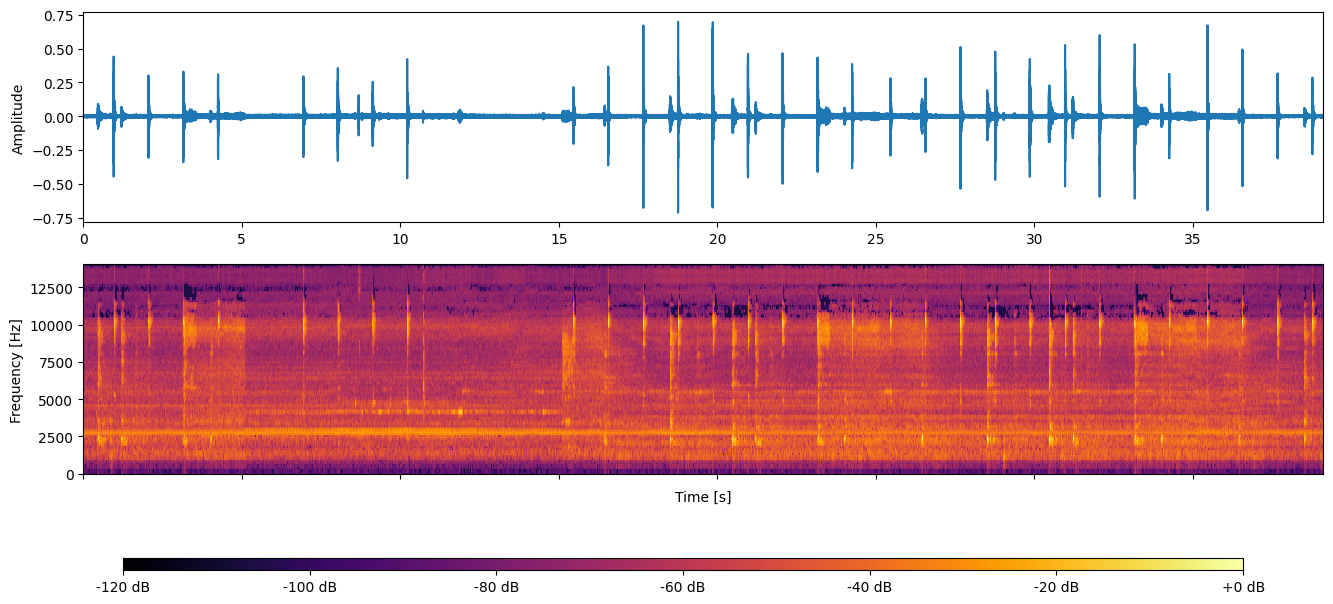

(1251286,)
(128, 2444)


In [7]:
# plot the wave and db-scaled mel-spectrogram of an audio file from the noise dataset

file_id_num = 20 # selected file ID number

print(f"Selected file: {audio_files_sorted[file_id_num]}")

if file_id_num < len(audio_files_sorted):
    audio_file_path = os.path.join(audio_dataset_dir_path, audio_files_sorted[file_id_num])
    signal, time, D_mel, D_mel_dB = processAudio.get_mel_spectrogram(audio_file_path, sampling_rate, hop_length, n_mels, f_min, f_max, a_squere_min, dB_ref)
    spectrogramPlotter.plot_single_wave_and_mel_spectrogram(signal, time, D_mel_dB, top_dB_abs, f_min, f_max, n_mels, sampling_rate)
else:
    print("File ID out of range")

print(signal.shape)
print(D_mel.shape)

In [8]:
print(len(signal))
print(signal.shape)

window_size = sharedValuesConfig.WINDOW_SIZE ## spectrogram columns in the window
print(window_size)

1251286
(1251286,)
32


(128, 8)
(4096,)
(4096,)


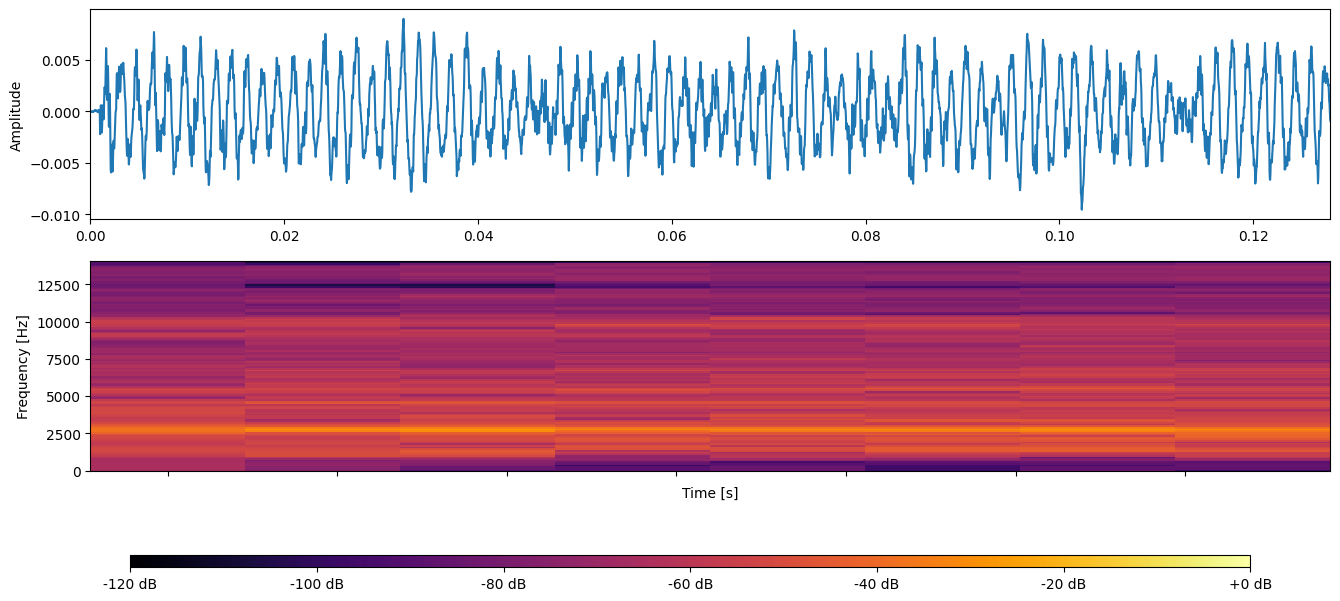

In [9]:
first_spectrogram_chunk = D_mel_dB[:, 0:(window_size//4)]
first_signal_chunk = signal[0:chunk_size]
first_time_chunk = time[0:chunk_size]
print(first_spectrogram_chunk.shape)
print(first_signal_chunk.shape)
print(first_time_chunk.shape)
spectrogramPlotter.plot_single_wave_and_mel_spectrogram(first_signal_chunk, first_time_chunk, first_spectrogram_chunk, top_dB_abs, f_min, f_max, n_mels, sampling_rate)

/var/folders/bj/7ggffpq918g65k1n35l6t6t40000gn/T/ipykernel_1789/2904229218.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sampling_rate = librosa.load(audio_file_path, sr=sampling_rate)
/opt/anaconda3/envs/clickSense/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


<class 'numpy.float32'>


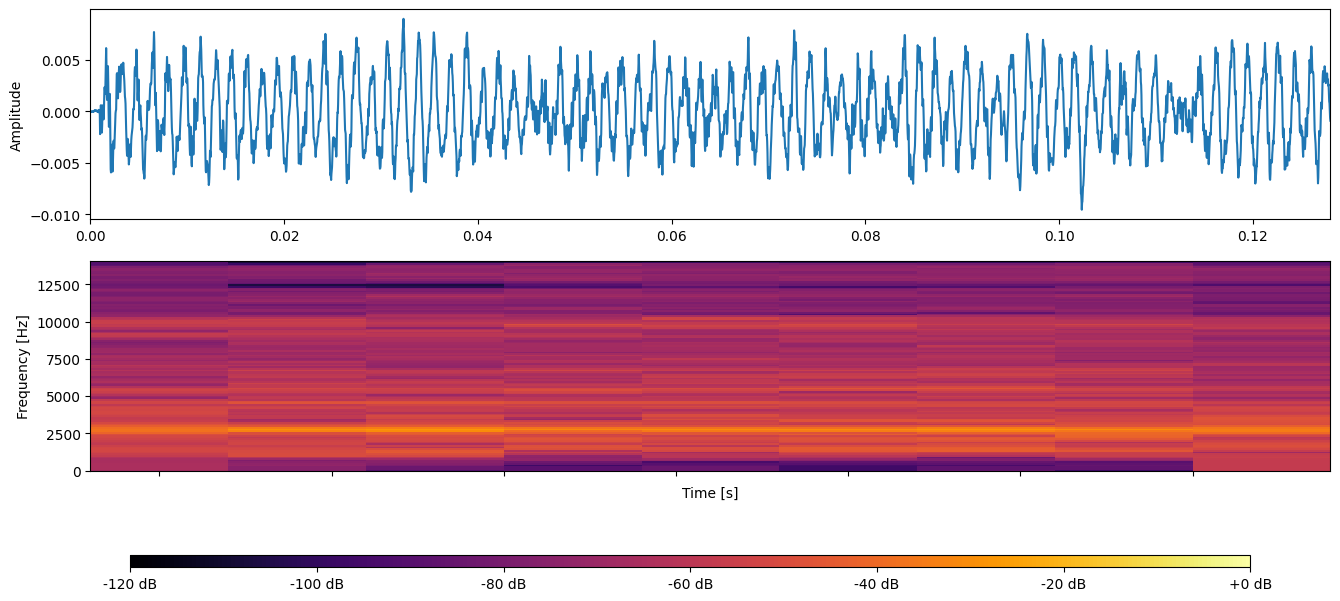

<class 'numpy.float32'>


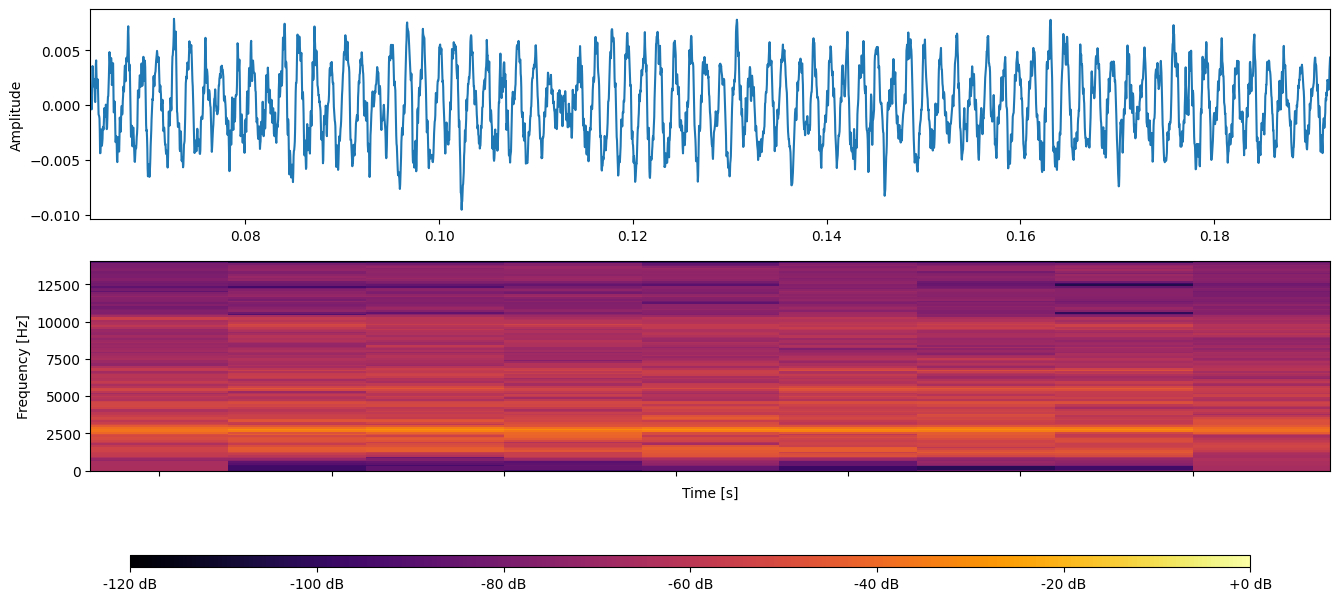

(4096,)
-30.604176
-30.604176
-28.844471


In [10]:
signal, sampling_rate = librosa.load(audio_file_path, sr=sampling_rate)

first_signal_chunk_2 = signal[0:chunk_size]
first_time_chunk_2 = np.linspace(0, chunk_size/sampling_rate, chunk_size)
second_signal_chunk_2 = signal[(chunk_size//2):(chunk_size//2 + chunk_size)]
second_time_chunk_2 = np.linspace(chunk_size//2/sampling_rate, (chunk_size + chunk_size//2)/sampling_rate, chunk_size)

def next_power_of_2(x):   
        next_power_of_two = 2**(math.ceil(math.log(x, 2)))

        if next_power_of_two == x:
            next_power_of_two *= 2

        return next_power_of_two

def power_mel_to_db(D_mel, a_squere_min, dB_ref):

        D_mel_dB = 10.0 * np.log10(np.maximum(a_squere_min, np.minimum(D_mel, dB_ref)/dB_ref))

        return D_mel_dB

def calculate_first_signal_chunk_spectrogram(signal, sampling_rate, hop_length, n_mels, f_min, f_max, a_squere_min, dB_ref):

    #print(signal.shape)

    padding_values_start = signal[0:hop_length//2]
    padding_values_end = signal[-hop_length//2:]

    # add padding values to the signal
    #signal = np.concatenate((padding_values_start, signal, padding_values_end), axis=None)

    # padding signal on both sides with hop_length/2 * zeros 
    #signal = np.pad(signal, (hop_length//2, hop_length//2), 'constant', constant_values=(0, 0))
    #print(signal.shape)
    print(type(signal[0]))

    n_fft = next_power_of_2(hop_length)
    #first_chunk_stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, center = False)
    chunk_stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, center = True)
    #print(first_chunk_stft.shape)
    D = np.abs(chunk_stft) ** 2
    mel_filter_bank = librosa.filters.mel(sr=sampling_rate, n_fft=n_fft, n_mels=n_mels, fmin=f_min, fmax=f_max, htk=True, norm=1)
    D_mel = np.dot(mel_filter_bank, D)
    D_mel_dB = power_mel_to_db(D_mel, a_squere_min=a_squere_min, dB_ref=dB_ref)

    return D_mel_dB


first_spectrogram_chunk_2 = calculate_first_signal_chunk_spectrogram(first_signal_chunk_2, sampling_rate, hop_length, n_mels, f_min, f_max, a_squere_min, dB_ref)
spectrogramPlotter.plot_single_wave_and_mel_spectrogram(first_signal_chunk_2, first_time_chunk_2, first_spectrogram_chunk_2, top_dB_abs, f_min, f_max, n_mels, sampling_rate)
second_spectrogram_chunk_2 = calculate_first_signal_chunk_spectrogram(second_signal_chunk_2, sampling_rate, hop_length, n_mels, f_min, f_max, a_squere_min, dB_ref)
spectrogramPlotter.plot_single_wave_and_mel_spectrogram(second_signal_chunk_2, second_time_chunk_2, second_spectrogram_chunk_2, top_dB_abs, f_min, f_max, n_mels, sampling_rate)

print(first_signal_chunk_2.shape)
# print spectrogram values in the second column
print(max(first_spectrogram_chunk_2[:, 5]))
print(max(second_spectrogram_chunk_2[:, 1]))

print(max(first_spectrogram_chunk[:, 6]))

#print(first_spectrogram_chunk_2.shape)


/var/folders/bj/7ggffpq918g65k1n35l6t6t40000gn/T/ipykernel_1789/1400898819.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sampling_rate = librosa.load(audio_file_path, sr=sampling_rate)
/opt/anaconda3/envs/clickSense/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


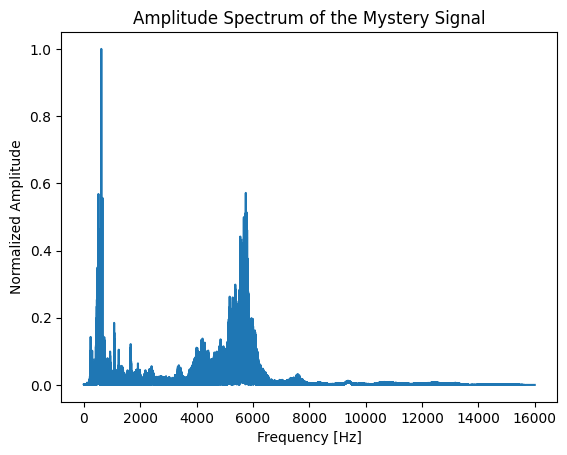

3918
Dominant Frequencies:  [ 461.45165853  462.96050623  463.95788013 ... 5844.99466948 5845.91532232
 5847.7054806 ]


In [11]:
import numpy as np
from scipy.fft import fft

signal, sampling_rate = librosa.load(audio_file_path, sr=sampling_rate)
n_samples = len(signal)
duration = n_samples / sampling_rate

# Perform the Fourier Transform on the mystery signal
signal_fft = fft(signal)

# Compute the amplitude spectrum
amplitude_spectrum = np.abs(signal_fft)

# Normalize the amplitude spectrum
amplitude_spectrum = amplitude_spectrum / np.max(amplitude_spectrum)

# Compute the frequency array
freqs = np.fft.fftfreq(n_samples, 1 / sampling_rate)

# Plot the amplitude spectrum in the frequency domain
plt.plot(freqs[:n_samples // 2], amplitude_spectrum[:n_samples // 2])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Normalized Amplitude")
plt.title("Amplitude Spectrum of the Mystery Signal")
plt.show()

# Find the dominant frequencies
threshold = 0.2
dominant_freq_indices = np.where(amplitude_spectrum[:n_samples // 2] >= threshold)[0]
dominant_freqs = freqs[dominant_freq_indices]
print(len(dominant_freqs))

print("Dominant Frequencies: ", dominant_freqs)

(128, 6)
(128, 12)
(6144,)


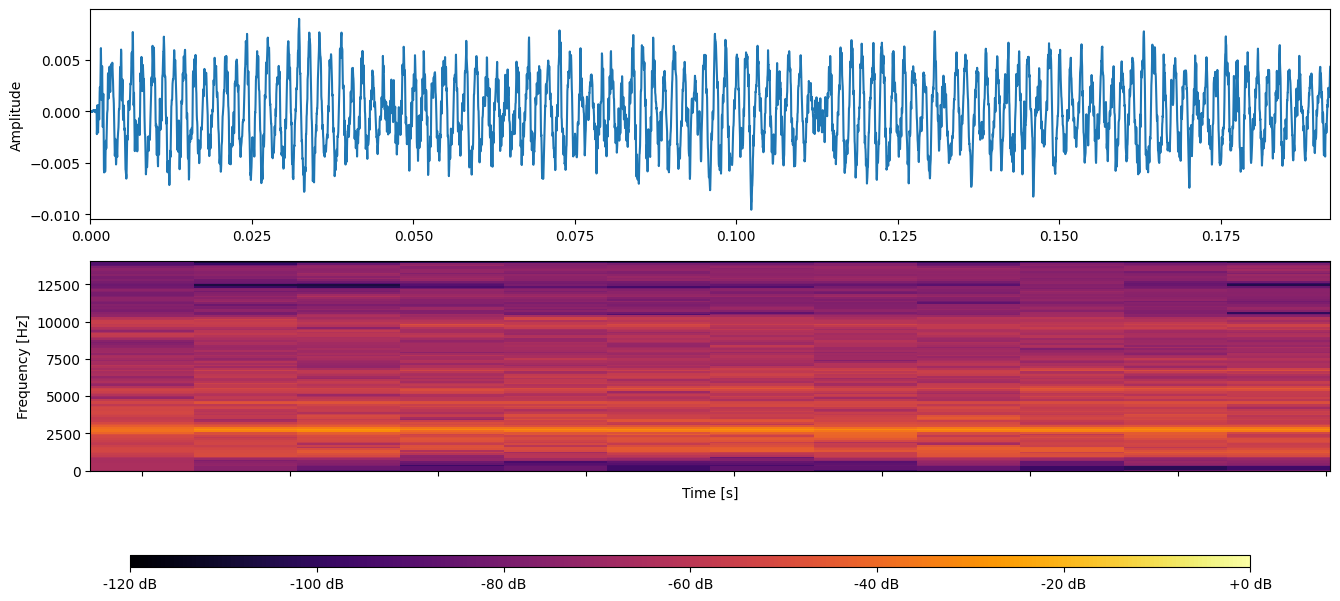

In [12]:
# concatenate first_spectrogram_chunk_2[:, 7] and second_spectrogram_chunk_2[:, 3]
concatenated_spectrogram = np.concatenate((first_spectrogram_chunk_2[:, 0:7], second_spectrogram_chunk_2[:, 3:8]), axis=1)

print(first_spectrogram_chunk_2[:, 0:6].shape)
print(concatenated_spectrogram.shape)

signal_concatenated = np.concatenate((first_signal_chunk_2[0:3584], second_signal_chunk_2[1536:4096]), axis = 0)
print(signal_concatenated.shape)

concatenated_time = np.linspace(0, signal_concatenated.shape[0]/sampling_rate, signal_concatenated.shape[0])

spectrogramPlotter.plot_single_wave_and_mel_spectrogram(signal_concatenated, concatenated_time, concatenated_spectrogram, top_dB_abs, f_min, f_max, n_mels, sampling_rate)



In [13]:
first_mid_signal_chunk = signal[(chunk_size//2):(chunk_size//2 + chunk_size)]
second_signal_chunk = signal[(chunk_size):(2*chunk_size)]

first_mid_signal_time = np.linspace(chunk_size//2/sampling_rate, (chunk_size + chunk_size//2)/sampling_rate, chunk_size)
second_signal_time = np.linspace(chunk_size/sampling_rate, (2*chunk_size)/sampling_rate, chunk_size)

print(type(first_mid_signal_chunk[0]))

print(first_signal_chunk.shape)
print(first_mid_signal_chunk.shape)
print(second_signal_chunk.shape)

first_spectrogram_chunk = calculate_first_signal_chunk_spectrogram(first_signal_chunk, sampling_rate, hop_length, n_mels, f_min, f_max, a_squere_min, dB_ref)
first_mid_spectrogram_chunk = calculate_first_signal_chunk_spectrogram(first_mid_signal_chunk, sampling_rate, hop_length, n_mels, f_min, f_max, a_squere_min, dB_ref)
second_spectrogram_chunk = calculate_first_signal_chunk_spectrogram(second_signal_chunk, sampling_rate, hop_length, n_mels, f_min, f_max, a_squere_min, dB_ref)

print(first_spectrogram_chunk.shape)
print(first_mid_spectrogram_chunk.shape)
print(second_spectrogram_chunk.shape)

print(max(first_spectrogram_chunk_2[:, 6]))
print(max(first_mid_spectrogram_chunk[:, 2]))

print(max(second_spectrogram_chunk[:, 2]))
print(max(first_mid_spectrogram_chunk[:, 6]))




<class 'numpy.float32'>
(4096,)
(4096,)
(4096,)
<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
(128, 9)
(128, 9)
(128, 9)
-28.844471
-28.844471
-30.08118
-30.08118


In [14]:
old_mic_input = np.zeros(chunk_size).astype(np.float32)

print(type(old_mic_input[0]))

# convert old_mic_input values to float 32
old_mic_input = old_mic_input.astype(np.float32)

print(type(old_mic_input[0]))

<class 'numpy.float32'>
<class 'numpy.float32'>


Selected file: HVA630_test_21.m4a


/Users/mateseidl/Library/CloudStorage/OneDrive-SZTAKI/_SZTAKI/03_Masters_thesis/01_TUM_Masterarbeit_Ausarbeitung/07_Click_event_detection_software/01_Electrical_Connector_Click-Event_Detection_git_repo/05_Utilities/audioProcessing.py:53: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sampling_rate = librosa.load(audio_file_path, sr=sampling_rate)
/opt/anaconda3/envs/clickSense/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Max value in the power spectrogram: 2117.218017578125


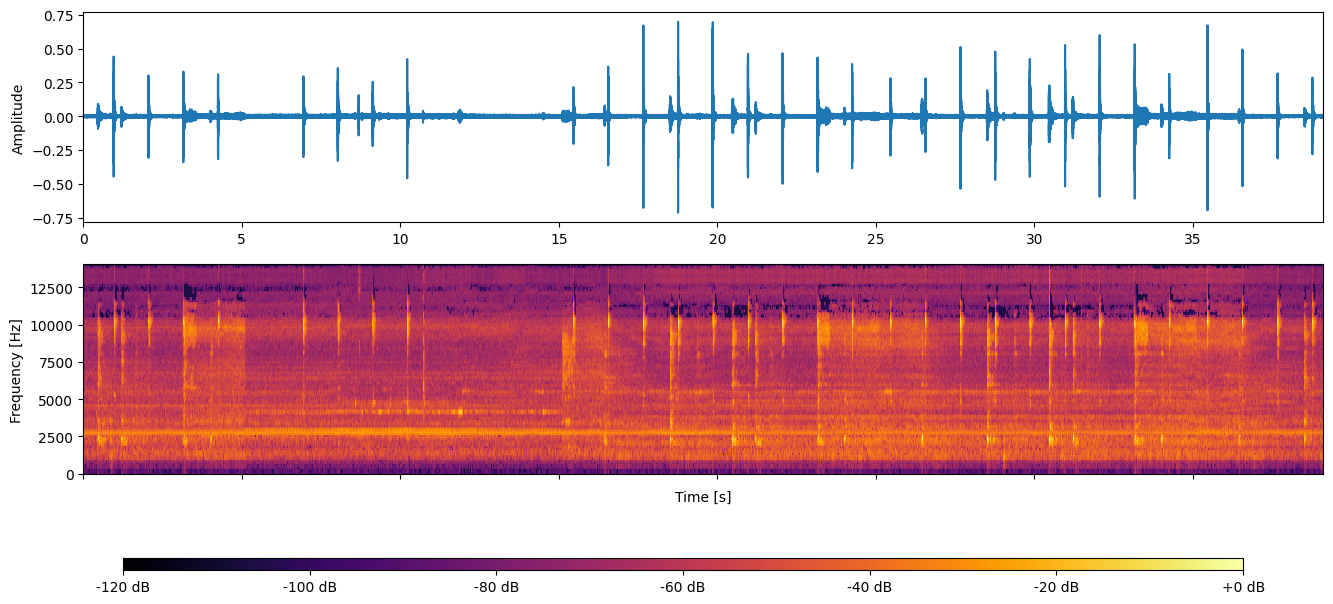

(1251286,)
(128, 2444)


In [15]:
# plot the wave and db-scaled mel-spectrogram of an audio file from the noise dataset

file_id_num = 20 # selected file ID number

print(f"Selected file: {audio_files_sorted[file_id_num]}")

if file_id_num < len(audio_files_sorted):
    audio_file_path = os.path.join(audio_dataset_dir_path, audio_files_sorted[file_id_num])
    signal, time, D_mel, D_mel_dB = processAudio.get_mel_spectrogram(audio_file_path, sampling_rate, hop_length, n_mels, f_min, f_max, a_squere_min, dB_ref)
    spectrogramPlotter.plot_single_wave_and_mel_spectrogram(signal, time, D_mel_dB, top_dB_abs, f_min, f_max, n_mels, sampling_rate)
else:
    print("File ID out of range")

print(signal.shape)
print(D_mel.shape)

In [16]:
# calculate the time for the max amplitude in the signal

for i in range(10):
    audio_file_path = os.path.join(audio_dataset_dir_path, audio_files_sorted[i])
    signal, time, D_mel, D_mel_dB = processAudio.get_mel_spectrogram(audio_file_path, sampling_rate, hop_length, n_mels, f_min, f_max, a_squere_min, dB_ref)

    # find max amplitude in the signal
    #max_amplitude_time = np.argmax(signal)/sampling_rate
    #print(f"Max amplitude time: {max_amplitude_time}")

    # find max amplitude in the signal after 5 seconds
    max_amplitude_time = np.argmax(signal[5*sampling_rate:])/sampling_rate + 5
    print(f"Max amplitude time: {max_amplitude_time}")


/Users/mateseidl/Library/CloudStorage/OneDrive-SZTAKI/_SZTAKI/03_Masters_thesis/01_TUM_Masterarbeit_Ausarbeitung/07_Click_event_detection_software/01_Electrical_Connector_Click-Event_Detection_git_repo/05_Utilities/audioProcessing.py:53: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sampling_rate = librosa.load(audio_file_path, sr=sampling_rate)
/opt/anaconda3/envs/clickSense/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Max value in the power spectrogram: 57.972137451171875
Max amplitude time: 23.77478125
Max value in the power spectrogram: 49.94752883911133
Max amplitude time: 22.10815625
Max value in the power spectrogram: 24.92660140991211
Max amplitude time: 25.284125
Max value in the power spectrogram: 104.78713989257812
Max amplitude time: 22.86215625
Max value in the power spectrogram: 98.06534576416016
Max amplitude time: 24.913
Max value in the power spectrogram: 16.895322799682617
Max amplitude time: 22.95125
Max value in the power spectrogram: 52.88383865356445
Max amplitude time: 24.73196875
Max value in the power spectrogram: 59.35681915283203
Max amplitude time: 25.27284375
Max value in the power spectrogram: 34.766807556152344
Max amplitude time: 25.78040625
Max value in the power spectrogram: 36.82470703125
Max amplitude time: 26.58465625
